In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#import the dataset
path= 'D:/study/datascience/data_science/drivedata/covid19_Confirmed_dataset.csv'
dataset = pd.read_csv(path)

In [7]:
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
#cleaning the dataset
dataset.shape

(266, 104)

In [9]:
#delete the useless columns
df = dataset.drop(['Lat','Long'],axis=1,inplace=True)

In [11]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [12]:
#aggregate rows by country
corona_dataset_aggregated = dataset.groupby('Country/Region').sum()

In [13]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [15]:
corona_dataset_aggregated.shape

(187, 101)

In [16]:
df = corona_dataset_aggregated.drop(['Province/State'],axis=1,inplace=True)

In [17]:
corona_dataset_aggregated.shape

(187, 100)

In [18]:
corona_dataset_aggregated.shape

(187, 100)

In [19]:
#visualize data related to countries
corona_dataset_aggregated.loc['China']

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

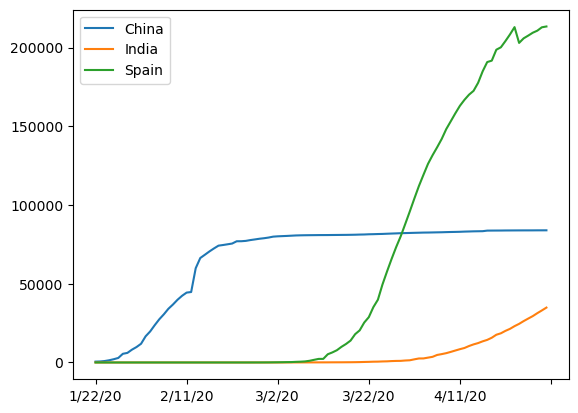

In [24]:
#visualize data related to countries with plot
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

<Axes: >

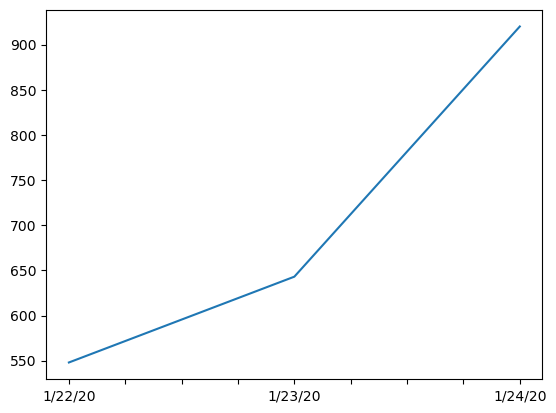

In [26]:
#calculate a good measure
corona_dataset_aggregated.loc['China'][:3].plot() #for first 3 days

In [27]:
#calculate the rate of curve using first derivative of curve
corona_dataset_aggregated.loc['China'].diff() #for each date first derivative is calculated

1/22/20      NaN
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
4/26/20      3.0
4/27/20      6.0
4/28/20     22.0
4/29/20      4.0
4/30/20     12.0
Name: China, Length: 100, dtype: float64

<Axes: >

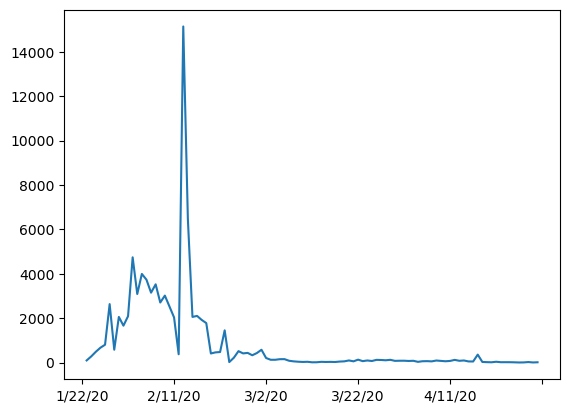

In [28]:
corona_dataset_aggregated.loc['China'].diff().plot()

In [33]:
#maximum infection rate
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [31]:
corona_dataset_aggregated.loc['India'].diff().max()

1893.0

In [32]:
corona_dataset_aggregated.loc['Spain'].diff().max()

9630.0

In [35]:
#create list of all countries
countries = list(corona_dataset_aggregated.index)
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [39]:
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated['Max_infection_rates'] = max_infection_rates

In [40]:
corona_dataset_aggregated.head #Max_infection_rates column added

<bound method NDFrame.head of                     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0    

In [45]:
df = corona_dataset_aggregated.drop(['Maxinfection_rates'],axis=1,inplace=True)

In [46]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [48]:
#create a new dataframe
corona_data =pd.DataFrame(corona_dataset_aggregated['Max_infection_rates'])

In [49]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [52]:
#import worldhappines report and select columns used for analysis
#import the dataset 2
path2= 'D:/study/datascience/data_science/drivedata/worldwide_happiness_report.csv'
happiness_report = pd.read_csv(path)

In [53]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [54]:
#drop useless columns
useless_cols = ['Overall rank','Score','Generosity','Perceptions of corruption']

In [55]:
happiness_report.drop(useless_cols,axis=1,inplace=True)

In [56]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [58]:
#remove numbered index and make country or region as index
happiness_report.set_index('Country or region',inplace = True)

KeyError: "None of ['Country or region'] are in the columns"

In [59]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [60]:
corona_data.shape

(187, 1)

In [61]:
happiness_report.shape

(156, 4)

In [62]:
#join the two datasets
data = corona_data.join(happiness_report, how ="inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [64]:
#carl pearson method
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

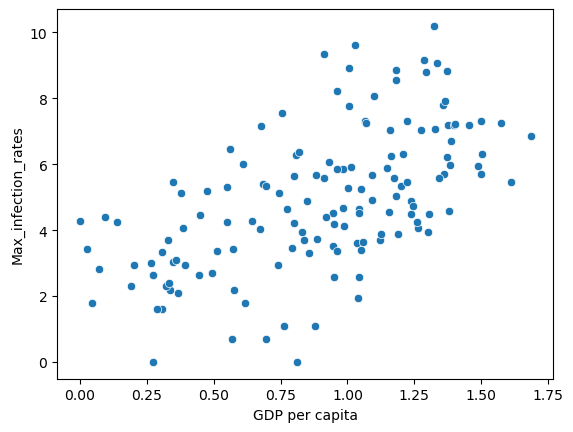

In [70]:
#Visualization
#graph between gdp and max_infection rate
x = data['GDP per capita']
y = data['Max_infection_rates']
sns.scatterplot(x=x,y=np.log(y)) #log scaling

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

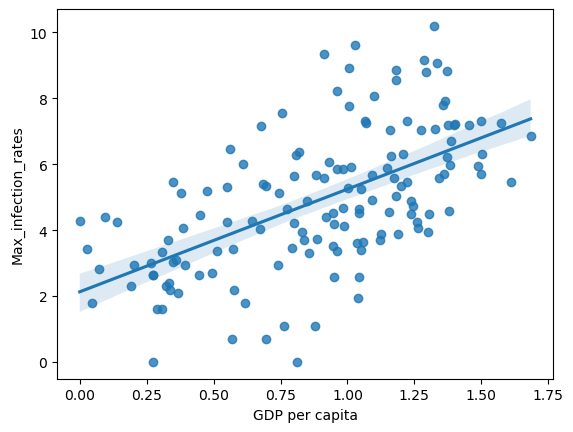

In [69]:
#regression model line plot
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

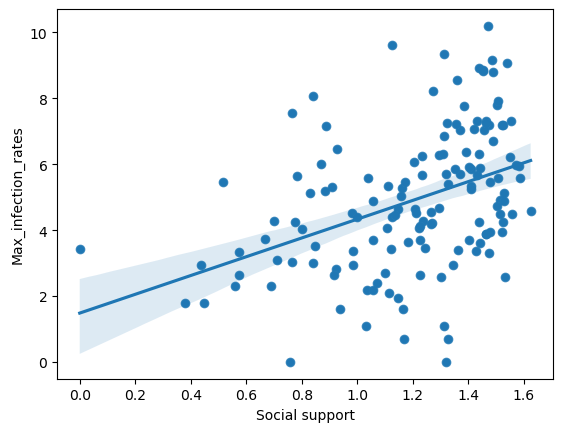

In [74]:
x = data['Social support']
y = data['Max_infection_rates']
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

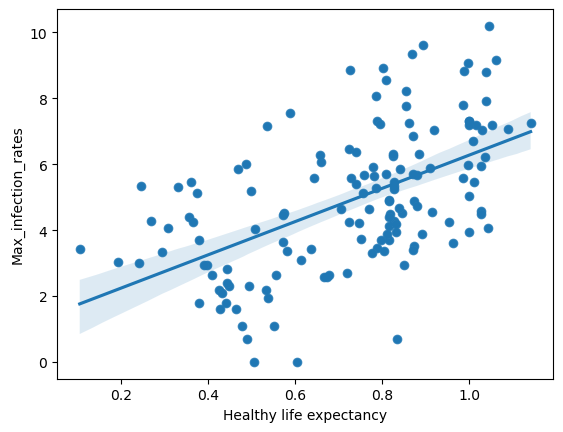

In [75]:
#Healthy life expectancy
x = data['Healthy life expectancy']
y = data['Max_infection_rates']
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

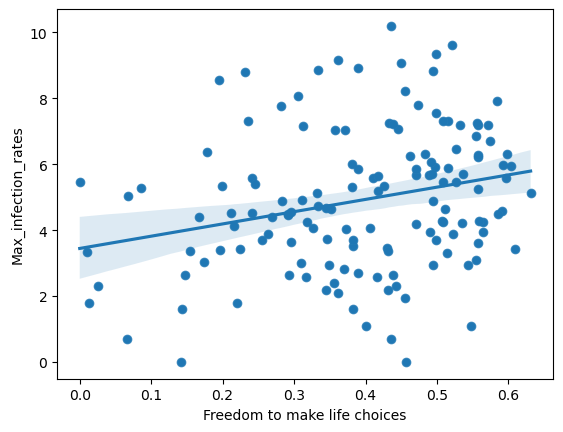

In [76]:
#Freedom to make life choices
x = data['Freedom to make life choices']
y = data['Max_infection_rates']
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x,y=np.log(y))